## use original data

### make sample data

In [1]:
# make sample data
import numpy as np

# seed fixed
np.random.seed(874)
# x coordinate
x = np.r_[np.random.normal(size=100,loc=5,scale=1),
          np.random.normal(size=100,loc=5,scale=1),
          np.random.normal(size=100,loc=-5,scale=1),
          np.random.normal(size=100,loc=-5,scale=1)]
# y coordinate
y = np.r_[np.random.normal(size=100,loc=5,scale=1),
          np.random.normal(size=100,loc=-5,scale=1),
          np.random.normal(size=100,loc=5,scale=1),
          np.random.normal(size=100,loc=-5,scale=1)]
data = np.c_[x, y]

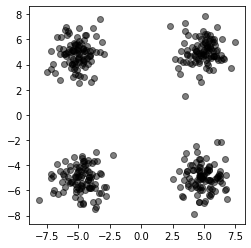

In [2]:
# plot data
import matplotlib.pyplot as plt

p = plt.subplot()
p.scatter(data[:,0], data[:,1], c = "black", alpha = 0.5)
p.set_aspect('equal')
plt.show()

In [3]:
# Assumed number of clusters
n_clusters = 4
# Maximum number of loops
max_iter = 300
# Initial affiliation cluster
clusters = np.random.randint(0, n_clusters, data.shape[0])

### plot pre-clustering of original data

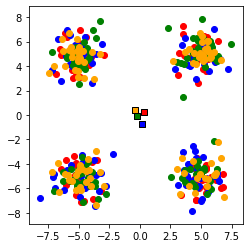

In [4]:
p = plt.subplot()

p.scatter(data[clusters==0, 0], data[clusters==0, 1], c = 'red')
p.scatter(data[clusters==1, 0], data[clusters==1, 1], c = 'blue')
p.scatter(data[clusters==2, 0], data[clusters==2, 1], c = 'green')
p.scatter(data[clusters==3, 0], data[clusters==3, 1], c = 'orange')
# Center point
centroids = np.array([data[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])
p.scatter(centroids[0, 0], centroids[0, 1], color='red', marker='s', edgecolors='black')
p.scatter(centroids[1, 0], centroids[1, 1], color='blue', marker='s', edgecolors='black')
p.scatter(centroids[2, 0], centroids[2, 1], color='green', marker='s', edgecolors='black')
p.scatter(centroids[3, 0], centroids[3, 1], color='orange', marker='s', edgecolors='black')

p.set_aspect('equal')

plt.show()

In [5]:
for i in range(max_iter):
    # Center point update
    # Average the data points of each cluster
    centroids = np.array([data[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])

    # Update affiliated cluster
    # Update the cluster at the nearest center point to the cluster to which it belongs
    new_clusters = np.array([np.linalg.norm(data - c, axis = 1) for c in centroids]).argmin(axis = 0)

    # If there are empty clusters, reassign the center point to a random point
    for n in range(n_clusters):
        if not np.any(new_clusters == n):
            centroids[n] = data[np.random.choice(data.shape[0], 1), :]

    # Convergence test
    if np.allclose(clusters, new_clusters):
        break

    clusters = new_clusters

### plot clustering of original data

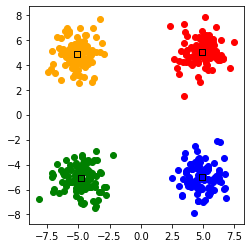

In [6]:
p = plt.subplot()

p.scatter(data[clusters==0, 0], data[clusters==0, 1], c = 'red')
p.scatter(data[clusters==1, 0], data[clusters==1, 1], c = 'blue')
p.scatter(data[clusters==2, 0], data[clusters==2, 1], c = 'green')
p.scatter(data[clusters==3, 0], data[clusters==3, 1], c = 'orange')
# Center point
centroids = np.array([data[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])
p.scatter(centroids[0, 0], centroids[0, 1], color='red', marker='s', edgecolors='black')
p.scatter(centroids[1, 0], centroids[1, 1], color='blue', marker='s', edgecolors='black')
p.scatter(centroids[2, 0], centroids[2, 1], color='green', marker='s', edgecolors='black')
p.scatter(centroids[3, 0], centroids[3, 1], color='orange', marker='s', edgecolors='black')

p.set_aspect('equal')

plt.show()

## use iris data

In [7]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris = load_iris()

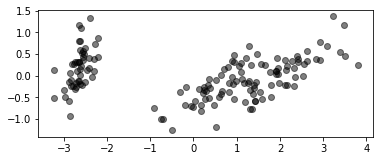

In [8]:
p = plt.subplot()
p.scatter(pca.fit_transform(iris.data)[:,0], pca.fit_transform(iris.data)[:,1], c = "black", alpha = 0.5)
p.set_aspect('equal')
plt.show()

### define a k_means function

In [9]:
def k_means(data, n_clusters, max_iter=300):
    clusters = np.random.randint(0, n_clusters, data.shape[0])
    for i in range(max_iter):
        # Center point update
        # Average the data points of each cluster
        centroids = np.array([data[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])

        # Update affiliated cluster
        # Update the cluster at the nearest center point to the cluster to which it belongs
        new_clusters = np.array([np.linalg.norm(data - c, axis = 1) for c in centroids]).argmin(axis = 0)

        # If there are empty clusters, reassign the center point to a random point
        for n in range(n_clusters):
            if not np.any(new_clusters == n):
                centroids[n] = data[np.random.choice(data.shape[0], 1), :]

        # Convergence test
        if np.allclose(clusters, new_clusters):
            break

        clusters = new_clusters
    return clusters

In [10]:
iris_clusters = k_means(pca.fit_transform(iris.data), 3, 300)

### plot iris data clustering

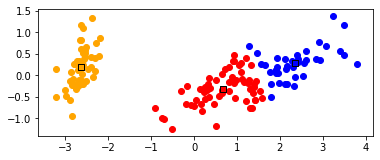

In [11]:
p = plt.subplot()

p.scatter(pca.fit_transform(iris.data)[iris_clusters==0, 0], pca.fit_transform(iris.data)[iris_clusters==0, 1], c = 'red')
p.scatter(pca.fit_transform(iris.data)[iris_clusters==1, 0], pca.fit_transform(iris.data)[iris_clusters==1, 1], c = 'blue')
p.scatter(pca.fit_transform(iris.data)[iris_clusters==2, 0], pca.fit_transform(iris.data)[iris_clusters==2, 1], c = 'orange')
# Center point
iris_centroids = np.array([pca.fit_transform(iris.data)[iris_clusters == n, :].mean(axis = 0) for n in range(3)])
p.scatter(iris_centroids[0, 0], iris_centroids[0, 1], color='red', marker='s', edgecolors='black')
p.scatter(iris_centroids[1, 0], iris_centroids[1, 1], color='blue', marker='s', edgecolors='black')
p.scatter(iris_centroids[2, 0], iris_centroids[2, 1], color='orange', marker='s', edgecolors='black')

p.set_aspect('equal')

plt.show()